## FACE RECOGNITION SYSTEM


This uses face_detection package which helps primarily in detecting faces in images . 

In [1]:
# import necessary modules/packages

import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [2]:
# load the images

image = cv2.imread('images/modi.jpg')
modi = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


image = cv2.imread('images/bill_gates.jpg')
bill_gates = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


image = cv2.imread('images/donald_trump.jpg')
donald_trump = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [3]:
# get the face encodings of each person

modi_encoding = face_recognition.face_encodings(modi)[0]

bill_gates_encoding = face_recognition.face_encodings(bill_gates)[0]

donald_trump_encoding = face_recognition.face_encodings(donald_trump)[0]



In [4]:
# create a database of all known face encodings

known_face_encodings = [
    
    modi_encoding,
    bill_gates_encoding,
    donald_trump_encoding
]

## Input test Image

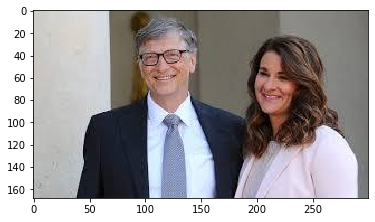

In [5]:
# load the image we want to check

image = cv2.imread('images/bill_gates3.jpg')
unknown_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# get the face encodings of the test image

unknown_face_encodings = face_recognition.face_encodings(unknown_image)


## Face Recognition output

Found Unknown in the photo!
Found Bill gates in the photo!


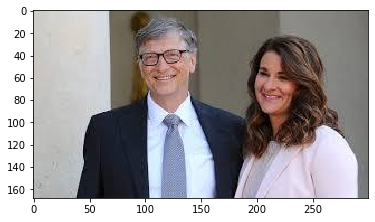

In [6]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
    
    results = []
    
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding,unknown_face_encoding)
        
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold
    
    name = "Unknown"
    
    if results[0]:
        name = "Narendra Modi ji"
    elif results[1]:
        name = "Bill gates"
    elif results[2]:
        name = "Donald trump"
        
    print(f"Found {name} in the photo!")
    plt.imshow(unknown_image)

    